In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Reading/ Preprocess Data and Undersampling

In [2]:
data = pd.read_csv('Family1.csv')
data.head()

,Unnamed: 0,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Threat_Binary,Threat
0,0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0
1,1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0
2,2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,...,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0
3,3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0
4,4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0


In [3]:
# Separate majority and minority classes
majority_class = data[data['Threat_Binary'] == 1]
minority_class = data[data['Threat_Binary'] == 0]

# Determine the number of samples to keep from the majority class
undersample_size = len(minority_class)

# Randomly select samples from the majority class
undersampled_majority = majority_class.sample(n=undersample_size, random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset to mix up the samples
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
y = undersampled_data['Threat_Binary']
#y = y.apply(lambda x: 1 if x ==0 else 0)
x = undersampled_data.copy(deep = True).drop(['Threat','Threat_Binary'],axis = 1)
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(x)

Epoch 1/10
1982/1982 [==============================] - 7s 3ms/step - loss: 0.0150 - accuracy: 0.9974 - val_loss: 0.0100 - val_accuracy: 0.9993
Epoch 2/10
1982/1982 [==============================] - 6s 3ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0177 - val_accuracy: 0.9995
Epoch 3/10
1982/1982 [==============================] - 5s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0266 - val_accuracy: 0.9996
Epoch 4/10
1982/1982 [==============================] - 5s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0332 - val_accuracy: 0.9996
Epoch 5/10
1982/1982 [==============================] - 6s 3ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0156 - val_accuracy: 0.9997
Epoch 6/10
1982/1982 [==============================] - 6s 3ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0310 - val_accuracy: 0.9998
Epoch 7/10
1982/1982 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0492 - val_accuracy:

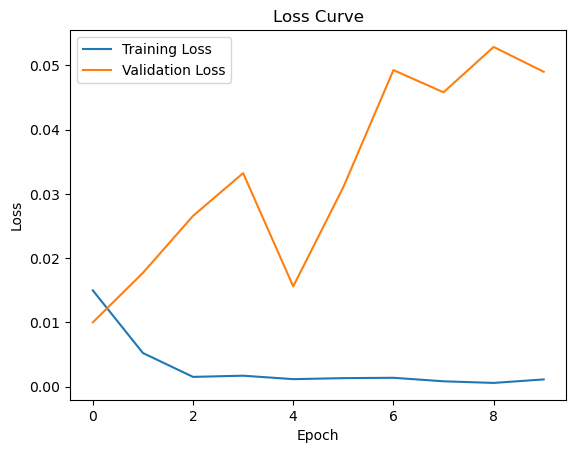

620/620 [==============================] - 1s 1ms/step


In [4]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are available
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert the data into TensorFlow tensors

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test,dtype = tf.float32)
# Define the feedforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming history is available from model training

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get predictions on the test set
y_pred_prob = model.predict(X_test_scaled)


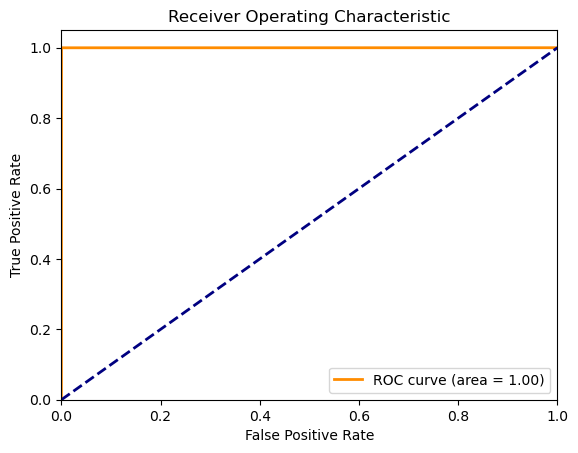

In [5]:

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [6]:
#
y_preds = np.where(y_pred_prob >= 0.5, 1, 0)
print(classification_report(y_test, y_preds))
#y_pred_prob

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9870
           1       1.00      1.00      1.00      9950

    accuracy                           1.00     19820
   macro avg       1.00      1.00      1.00     19820
weighted avg       1.00      1.00      1.00     19820



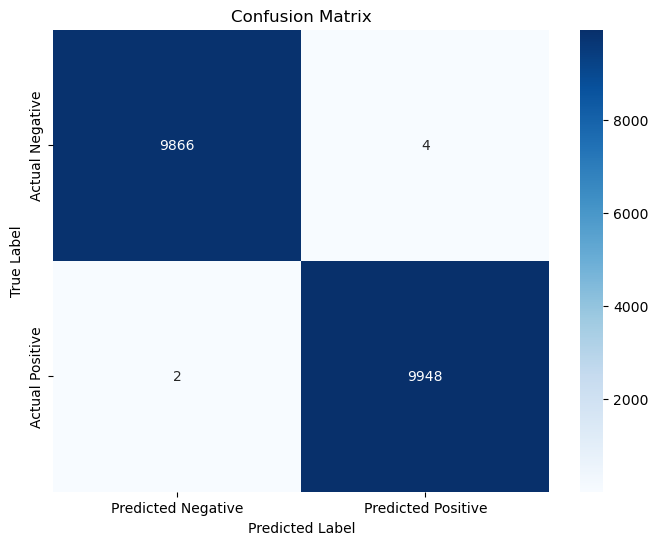

In [7]:
cm = confusion_matrix(y_test, y_preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()